In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from IPython import display
import time
%matplotlib inline
%config InlineBackend.figure_format='retina'

### K Means

In [2]:
data1 = sio.loadmat('data/kmeans2.mat')
x = data1['X']

In [22]:
def find_closest_centroids(x,centroids):
    x_expanded = np.expand_dims(x,axis=1)
    diff = np.sum((x_expanded - centroids)**2,axis=-1)
    ind = np.argmin(diff,axis=-1)
    return ind

def compute_centroids(x,ind,k):
    centroids=np.zeros((k,x.shape[1]))
    for i in range(k):
        centroids[i,:] = np.mean(x[np.where(ind==i)],axis=0)
    return centroids

def init_centroids(x,k):
    rand_ind = np.random.randint(low=0,high=x.shape[0],size=k)
    centroids = x[rand_ind]
    return centroids

In [4]:
#visualize
def visualize(x,centroids,ind, ax):
    _=sns.scatterplot(x[:,0],x[:,1],hue=ind,palette='viridis',legend=False,ax=ax)
    _=sns.scatterplot(centroids[:,0],centroids[:,1],marker='^', edgecolor='k', s=100, hue = np.arange(centroids.shape[0]),legend=False, palette='viridis',ax=ax)

In [41]:
def run_k_means(x,initial_centroids,max_iters,plot):
    centroids = initial_centroids
    k = initial_centroids.shape[0]
    ind = find_closest_centroids(x,initial_centroids)
    if plot:
        fig = plt.figure(figsize=(10,8))
        ax = plt.gca()
        visualize(x,centroids,ind,ax)
    for iter in range(max_iters):
        ind = find_closest_centroids(x,centroids)
        centroids = compute_centroids(x,ind,k)
        if plot:
            visualize(x,centroids,ind,ax)
            display.display(plt.gcf())
            time.sleep(1.0)
            display.clear_output(wait=True)
    return centroids

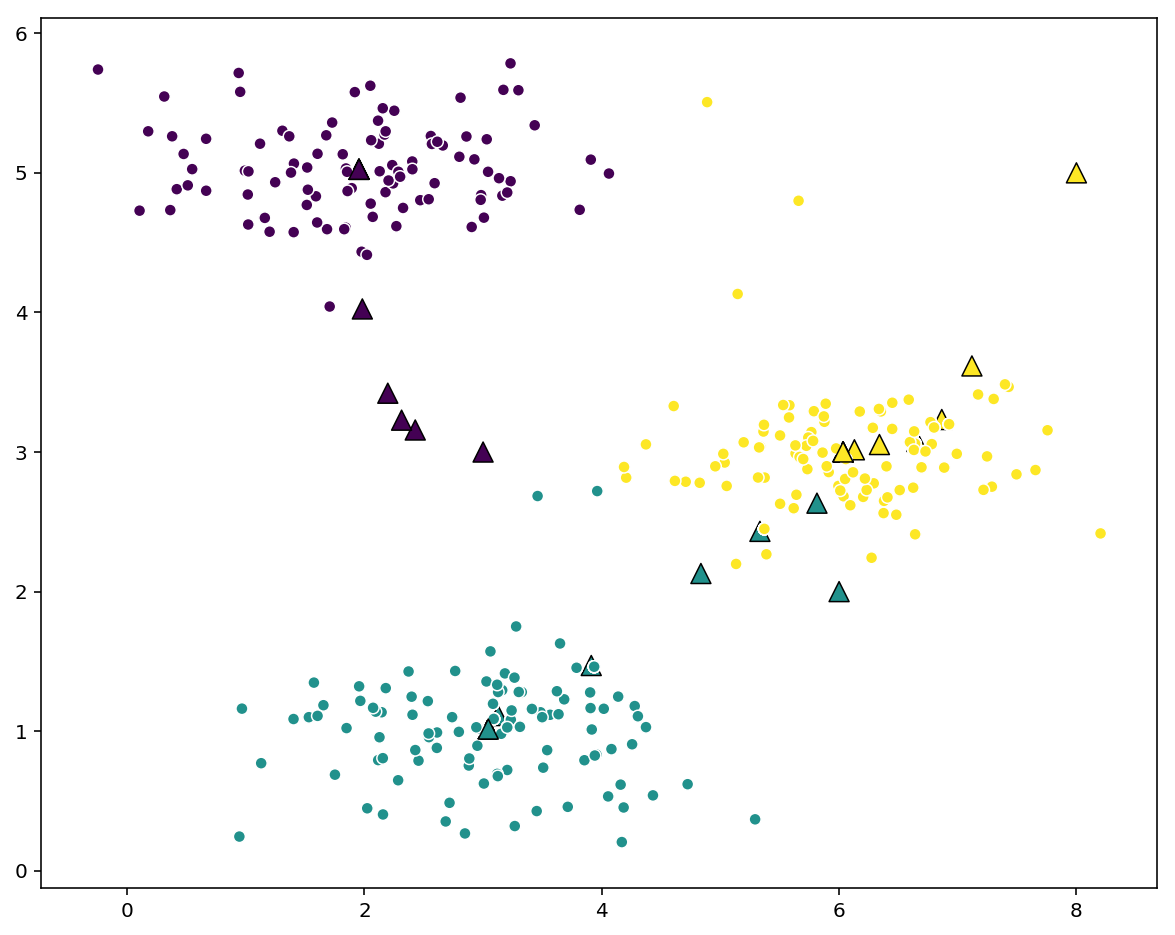

In [42]:
k = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters=10
centroids = run_k_means(x,initial_centroids,max_iters,plot=True)

### Image Compression with K means

In [54]:
img = plt.imread('data/bird_small.png')
img_norm = img/255
x1 = np.reshape(img_norm,(img.shape[0]*img.shape[1],img.shape[2]))
k = 16
max_iters=10
initial_centroids = init_centroids(x1,k)
centroids = run_k_means(x1,initial_centroids,max_iters,False)
ind = find_closest_centroids(x1,centroids)
img_comp = np.reshape(centroids[ind],(img.shape[0],img.shape[1],img.shape[2]))*255

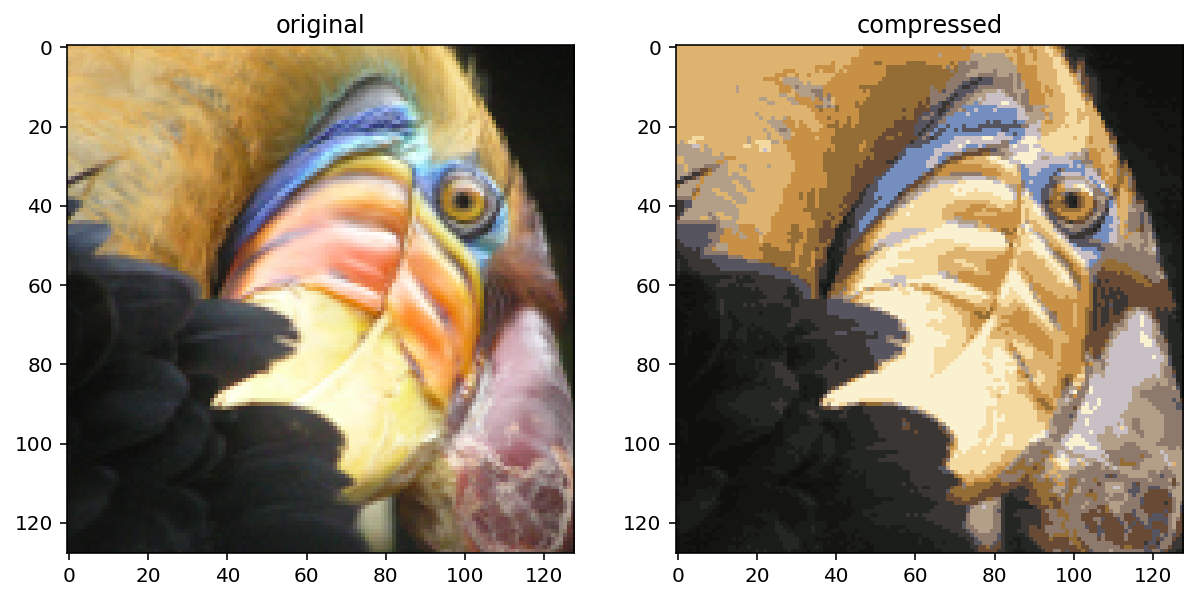

In [65]:
fig, axes = plt.subplots(1,2,figsize=(10,8))
_=axes[0].imshow(img)
_=axes[0].set_title('original')
_=axes[1].imshow(img_comp)
_=axes[1].set_title('compressed')

### PCA

In [78]:
data2 = sio.loadmat('data/pca1.mat')
x=data2['X']
mu = x.mean(axis=0)
std = x.std(axis=0)
x_norm = (x-mu)/std
cov = 1/x.shape[0] * np.dot(x_norm.T,x_norm)
u,s,v = np.linalg.svd(cov)

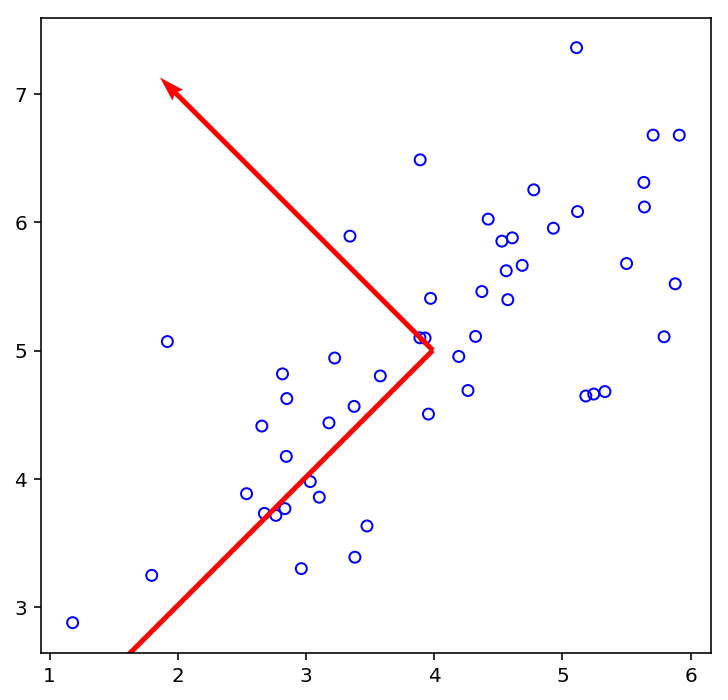

In [89]:
figure = plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1)
plt.gca().set_aspect('equal')
plt.quiver(mu[0], mu[1], u[0,0], u[1,0], scale=s[1], color='r')
plt.quiver(mu[0], mu[1], u[0,1], u[1,1], scale=s[0], color='r');

In [90]:
k=1
u_red = u[:,:k]
z=x.T*